# <center>Tarefa 01  CK0048 - Métodos Numéricos 2

1) Assistir ao vídeo https://www.youtube.com/watch?v=waNQ-7ckw0I

2) Desenvolver as máscaras de derivada discutidas no vídeo

3) Implementar o detector de bordas discutido no vídeo

    3.1) Ler uma imagem em escala de cinzas (ou ler imagem colorida e transformar para escala de cinzas)

    3.2) Ampliar a imagem para que ela tenha dois pixels a mais na direção horizontal (uma coluna de pixels à esquerda da imagem e uma coluna de pixels à direita da imagem) e dois pixels a mais na direção vertical (uma linha de pixels no topo da imagem e uma linha na base da imagem). Esses pixels adicionais terão valor de intensidade iguais a zero.

    3.3) usar uma máscara de derivada (abordagem central) e aplicá-la a cada pixel da imagem ampliada que não seja um pixel de borda. O resultado da aplicação da máscara sobre um pixel é copiado no pixel correspondente de uma imagem nova.

    3.4) Exibir a imagem original e a imagem nova.

In [1]:
from PIL import Image as ImagePIL
from IPython.display import Image
import numpy as np
import os,platform
#from tkinter import Tk
#from tkinter.filedialog import askopenfilename


## Funções de manipulação da Imagem

In [2]:
def redim(x,y,imagem):
    c = np.copy(imagem)
    c = np.insert(c,0,0,1)#PRIMEIRA COLUNHA
    c = np.insert(c,0,0,0)#PRIMERA LINHA
    c = np.insert(c,x+1,0,1)#COLUNA NO FIM
    c = np.insert(c,y+1,0,0)#LINHA NO FIM


    return c

In [3]:
def central(x,y,array_imagem_original):
    array_nova_imagem = np.copy(array_imagem_original)
    for i in range(1,y-1):
        for k in range (1,x-1):
            array_nova_imagem[i,k] = abs((array_imagem_original[i+1,k])/2 - (array_imagem_original[i-1,k])/2) + abs((array_imagem_original[i,k+1])/2 - (array_imagem_original[i,k-1])/2)
    return array_nova_imagem


In [4]:
def blurr(x,y,array_imagem_original):
    array_nova_imagem = np.copy(array_imagem_original)
    for i in range(1,y-1):
        for k in range (1,x-1):
            array_nova_imagem[i,k] = (array_imagem_original[i+1,k]/8 + array_imagem_original[i-1,k]/8 + array_imagem_original[i,k+1]/8 + array_imagem_original[i,k-1]/8 + array_imagem_original[i-1,k-1]/8 + array_imagem_original[i-1,k+1]/8 + array_imagem_original[i+1,k-1]/8 + array_imagem_original[i+1,k+1]/8)
    return array_nova_imagem

In [14]:
def aplicarfiltro(caminho):
    caminho_final = [] #array q eu vou acumulando o caminho pras novas imagens
    caminho_final.append(caminho)
    

    #abre a imagem
    image = ImagePIL.open(caminho) 
    image = image.convert('L')

    array_img_originial = np.asarray(image)
    y,x = array_img_originial.shape
    #print("Escala da imagem original %d x %d"%(x,y))
    
    ############# Redmensionando a imagem
    array_img_originial_aumentada = redim(x,y,array_img_originial)
    img_aumentada = ImagePIL.fromarray(np.absolute(array_img_originial_aumentada))
    img_aumentada.save("img_original_aumentada.jpg")
    caminho_final.append("img_original_aumentada.jpg")
    y,x = array_img_originial_aumentada.shape

    ################ Passando blur pra melhorar na filtragem
    array_img_blurr = blurr(x,y,array_img_originial_aumentada)
    img_blurr = ImagePIL.fromarray(np.absolute(array_img_blurr))
    img_blurr.save("img_blurr.jpg")
    caminho_final.append("img_blurr.jpg")
    ############## Passando filtro de derivada com blur
    array_img_final_cblurr = central(x,y,array_img_blurr)
    img_final_cblurr = ImagePIL.fromarray(np.absolute(array_img_final_cblurr))
    img_final_cblurr.save("img_final_cblurr.jpg")
    caminho_final.append("img_final_cblurr.jpg")
    

    ############## Passando filtro de derivada sem blur
    array_img_final_sblurr = central(x,y,array_img_originial_aumentada)
    img_final_sblurr = ImagePIL.fromarray(np.absolute(array_img_final_sblurr))
    img_final_sblurr.save("img_final_sblurr.jpg")
    caminho_final.append("img_final_sblurr.jpg")


    
    return caminho_final
    #return caminho_final
    #esse array e pro caso de precisar do blur

## Funcao pra refatorar o caminho que o usuario inseriu

# <center>Células de execução do programa 

## Exibindo imagem original

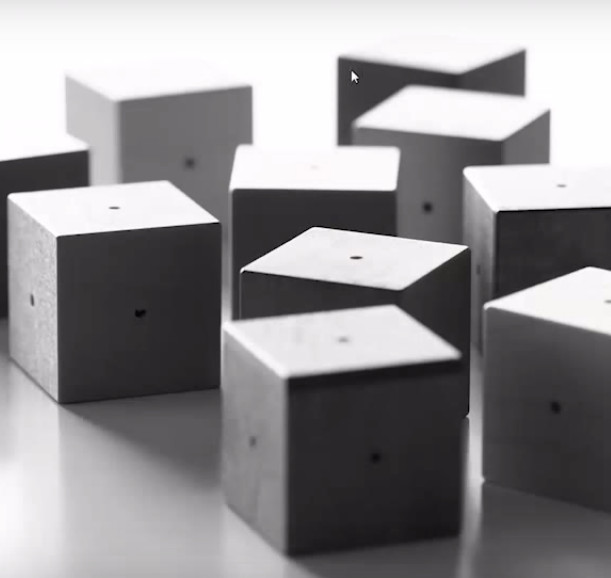

In [6]:
caminho = 'dados_video.jpg'
original = Image(filename=caminho , width=280, height = 282)
display(original)

# Exbindo imagem com filtro

central x = 613 y = 580
central x = 613 y = 580
dados_video.jpg


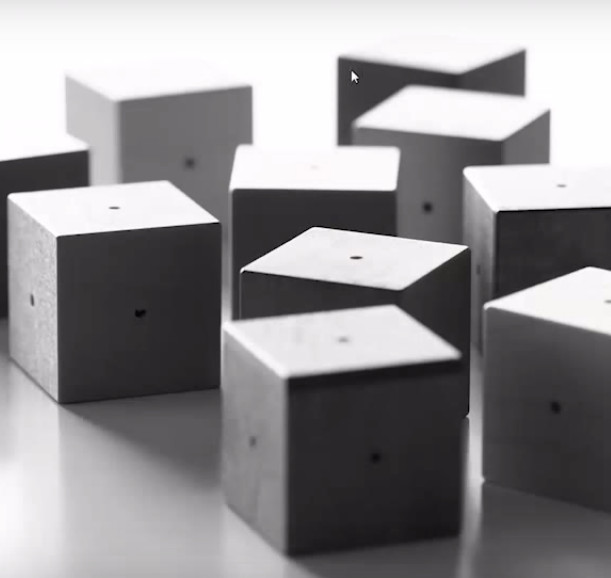

img_original_aumentada.jpg


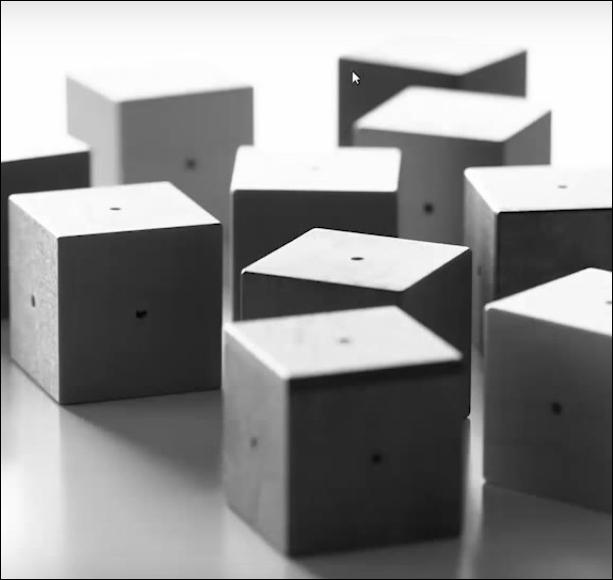

img_blurr.jpg


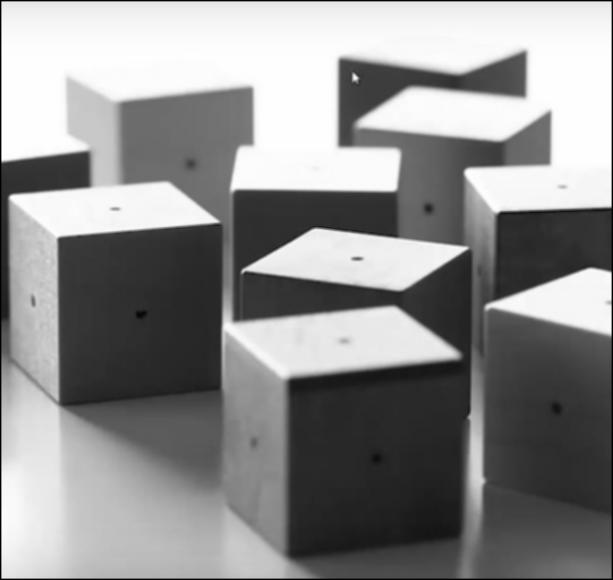

img_final_cblurr.jpg


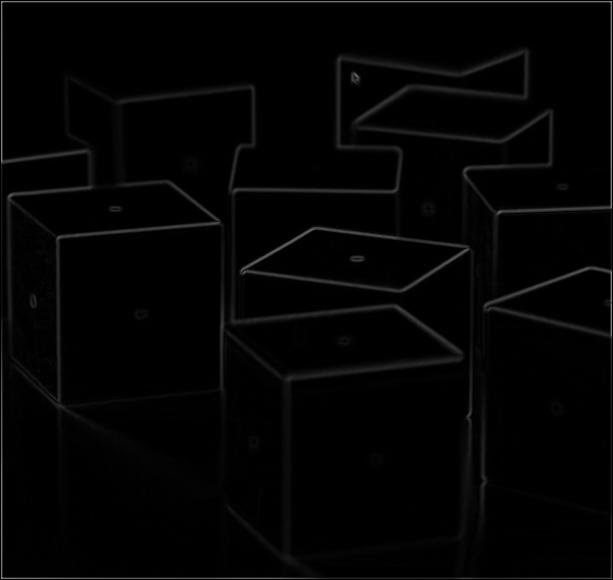

img_final_sblurr.jpg


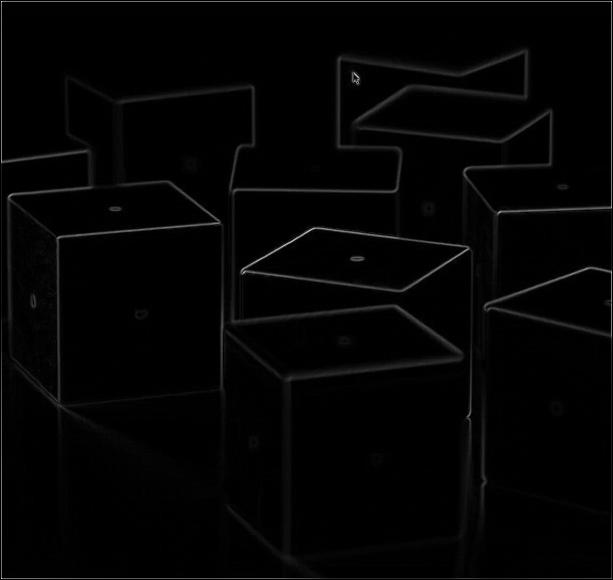

In [15]:
imagens_alteradas = aplicarfiltro(caminho)
for i in imagens_alteradas:
    print(i)
    k = Image(filename = i, width=280, height = 282)
    display(k)
